# Yolo classification

In [1]:
from ultralytics import YOLO

/Users/sayyedjilani/anaconda3/envs/yolov8/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [5]:
model = YOLO('yolov8n-cls.pt')

100%|██████████████████████████████████████| 5.28M/5.28M [00:00<00:00, 37.3MB/s]


# Train Fans

In [16]:
model.train(data='/Users/sayyedjilani/datasci210/dataset/fan_data', epochs=10,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/dataset/fan_data, epochs=10, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_m

In [6]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
os.getcwd()

'/Users/sayyedjilani/datasci210'

In [18]:
results_path = './runs/classify/train/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.17119,0.59756,1,0.60830,0.070250,0.003306,0.003306
1,1,0.14554,0.76829,1,0.48104,0.039593,0.005982,0.005982
2,2,0.10121,0.82439,1,0.43974,0.008275,0.007998,0.007998
3,3,0.05949,0.91707,1,0.36925,0.007030,0.007030,0.007030
4,4,0.04919,0.90976,1,0.37874,0.007030,0.007030,0.007030
5,5,0.03859,0.94634,1,0.34749,0.006040,0.006040,0.006040
6,6,0.02752,0.93415,1,0.34449,0.005050,0.005050,0.005050
7,7,0.02102,0.94634,1,0.34145,0.004060,0.004060,0.004060
8,8,0.01674,0.95854,1,0.32448,0.003070,0.003070,0.003070
9,9,0.00961,0.97073,1,0.31503,0.002080,0.002080,0.002080


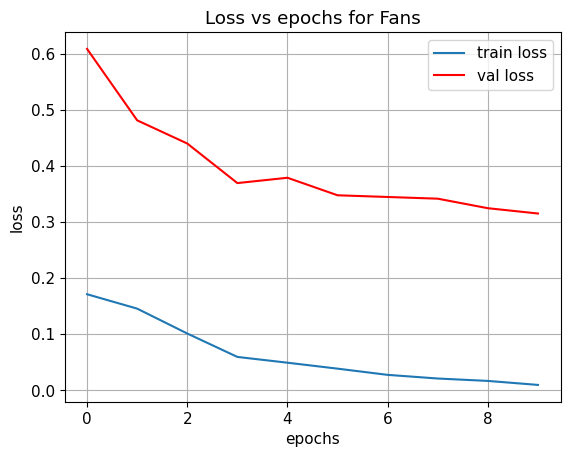

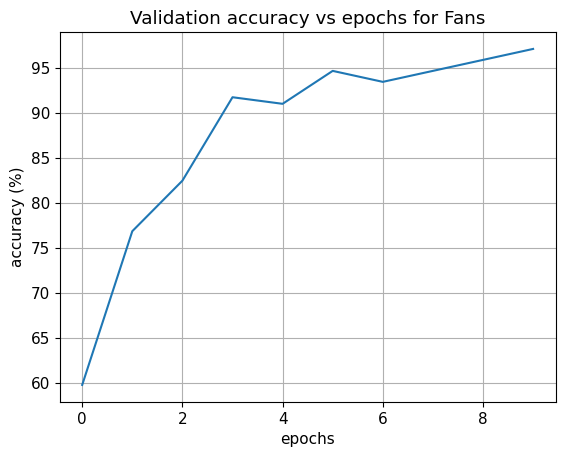

In [19]:
plt.figure()
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Fans')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Fans')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [2]:
# use the last model trained
fan_model = YOLO('/Users/sayyedjilani/datasci210/runs/classify/train/weights/last.pt')

#predict on image
pred = fan_model('/Users/sayyedjilani/datasci210/dataset/fan_data/test/abnormal/103.png')

print(pred[0].names)
print(pred[0].probs)
                 


image 1/1 /Users/sayyedjilani/datasci210/dataset/fan_data/test/abnormal/103.png: 224x224 abnormal 1.00, normal 0.00, 7.2ms
Speed: 0.0ms preprocess, 7.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


{0: 'abnormal', 1: 'normal'}
tensor([9.9987e-01, 1.2986e-04])


In [26]:
#predict on image
pred = fan_model('/Users/sayyedjilani/datasci210/dataset/fan_data/test/normal/0.png')

print(pred[0].names)
print(pred[0].probs)
                 


image 1/1 /Users/sayyedjilani/datasci210/dataset/fan_data/test/normal/0.png: 224x224 normal 1.00, abnormal 0.00, 18.6ms
Speed: 0.1ms preprocess, 18.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


{0: 'abnormal', 1: 'normal'}
tensor([1.0804e-06, 1.0000e+00])


# Train pumps

In [17]:
model = YOLO('yolov8n-cls.pt')
model.train(data='/Users/sayyedjilani/datasci210/dataset/pump_data', epochs=10,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/dataset/pump_data, epochs=10, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

In [28]:
results_path = './runs/classify/train1/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.15711,0.78293,1,0.52977,0.070250,0.003306,0.003306
1,1,0.11802,0.82195,1,0.46296,0.039593,0.005982,0.005982
2,2,0.07459,0.81220,1,0.46209,0.008275,0.007998,0.007998
3,3,0.05137,0.91220,1,0.37581,0.007030,0.007030,0.007030
4,4,0.03649,0.94146,1,0.34676,0.007030,0.007030,0.007030
5,5,0.02624,0.96341,1,0.33010,0.006040,0.006040,0.006040
6,6,0.02053,0.95610,1,0.33252,0.005050,0.005050,0.005050
7,7,0.01233,0.97317,1,0.31567,0.004060,0.004060,0.004060
8,8,0.00882,0.97805,1,0.31422,0.003070,0.003070,0.003070
9,9,0.00888,0.96829,1,0.31148,0.002080,0.002080,0.002080


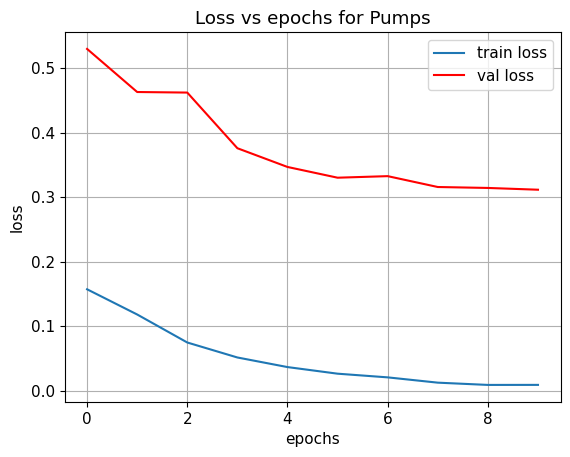

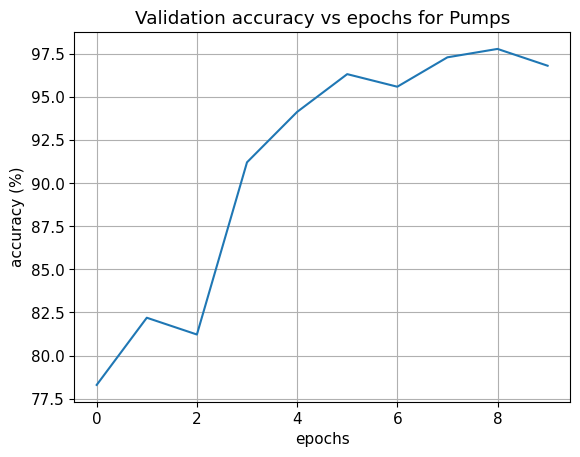

In [29]:
plt.figure()
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Pumps')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Pumps')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

# Train Sliders

In [27]:
model = YOLO('yolov8n-cls.pt')
model.train(data='/Users/sayyedjilani/datasci210/dataset/slider_data', epochs=10,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/dataset/slider_data, epochs=10, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

In [30]:
results_path = './runs/classify/train2/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.16853,0.63902,1,0.57192,0.070250,0.003306,0.003306
1,1,0.11141,0.72927,1,0.50619,0.039593,0.005982,0.005982
2,2,0.06039,0.92683,1,0.35259,0.008275,0.007998,0.007998
3,3,0.03351,0.96829,1,0.32461,0.007030,0.007030,0.007030
4,4,0.02136,0.97561,1,0.31380,0.007030,0.007030,0.007030
5,5,0.01415,0.99024,1,0.30180,0.006040,0.006040,0.006040
6,6,0.01144,0.97317,1,0.31086,0.005050,0.005050,0.005050
7,7,0.00829,0.99024,1,0.29906,0.004060,0.004060,0.004060
8,8,0.00511,0.99024,1,0.29862,0.003070,0.003070,0.003070
9,9,0.00445,0.98537,1,0.29782,0.002080,0.002080,0.002080


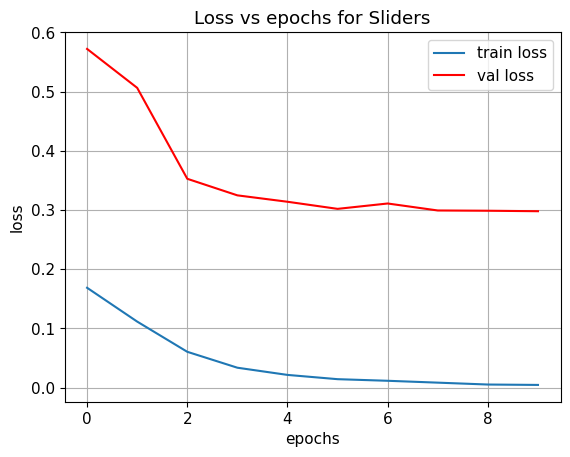

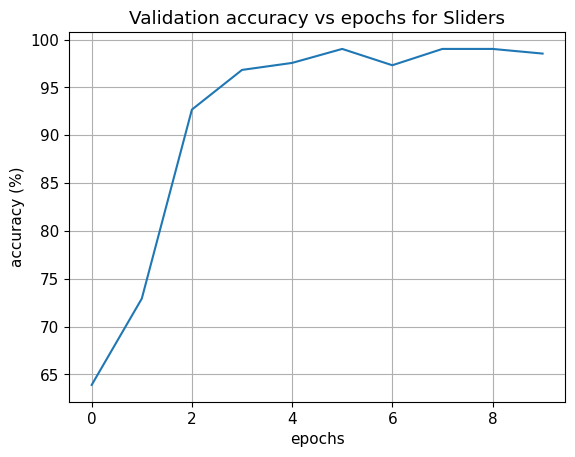

In [31]:
plt.figure()
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Sliders')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Sliders')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

# Train Valves

In [32]:
model = YOLO('yolov8n-cls.pt')
model.train(data='/Users/sayyedjilani/datasci210/dataset/valve_data', epochs=10,imgsz=224)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.12.4 torch-2.3.1 CPU
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/Users/sayyedjilani/datasci210/dataset/valve_data, epochs=10, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

In [33]:
results_path = './runs/classify/train3/results.csv'

results = pd.read_csv(results_path)
results.columns = results.columns.str.strip()


results

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.17286,0.55122,1,0.63153,0.070250,0.003306,0.003306
1,1,0.17042,0.60732,1,0.62317,0.039593,0.005982,0.005982
2,2,0.15423,0.68293,1,0.54485,0.008275,0.007998,0.007998
3,3,0.06947,0.96829,1,0.32643,0.007030,0.007030,0.007030
4,4,0.02876,0.99268,1,0.30210,0.007030,0.007030,0.007030
5,5,0.01029,0.99024,1,0.29762,0.006040,0.006040,0.006040
6,6,0.00682,0.99756,1,0.29115,0.005050,0.005050,0.005050
7,7,0.00408,0.99756,1,0.29079,0.004060,0.004060,0.004060
8,8,0.00223,0.99268,1,0.29298,0.003070,0.003070,0.003070
9,9,0.00222,0.99268,1,0.29184,0.002080,0.002080,0.002080


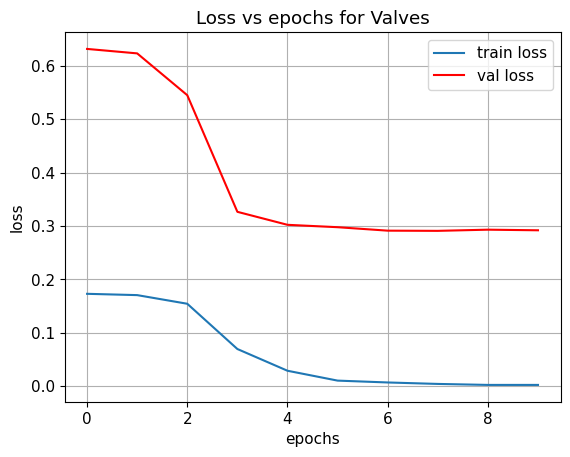

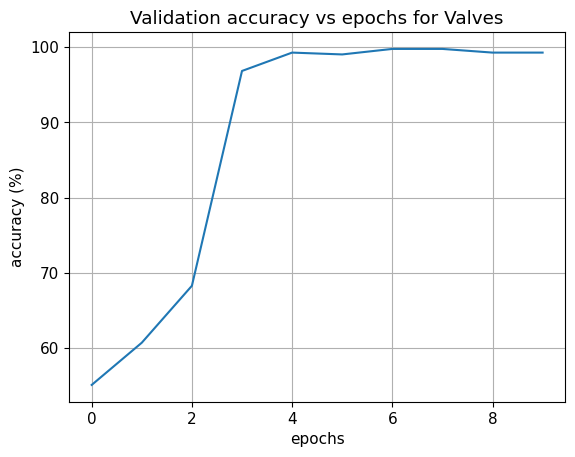

In [34]:
plt.figure()
plt.plot(results['epoch'], results['train/loss'], label='train loss')
plt.plot(results['epoch'], results['val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs for Valves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['epoch'], results['metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs for Valves')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()